In [181]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [182]:
#Laster inn TESLA CSV filen inn i variablen Data
data = pd.read_csv('TSLA.csv')

In [183]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,206.871435,211.374821,202.237370,206.938207,206.938207,1.355252e+08
std,44.895418,45.279789,44.593873,44.957991,44.957991,4.063076e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,5.067270e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,1.070266e+08
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.282597e+08
75%,249.385002,255.080001,244.464996,250.215004,250.215004,1.610392e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


In [184]:
#Konverterer 'Date' kolonnen til 'datetime'-objekt
data['Date'] = pd.to_datetime(data['Date'])

In [185]:
#Sorterer dataene i riktig rekkefølge ut i fra datoer
data = data.sort_values(by='Date')

In [186]:
#Gjør om datetime til heltallsverdier, og setter 'Date' til variablen X og 'Close' til variablen y
data['Date_Ordinal'] = data['Date'].apply(lambda x: x.toordinal())
X = data[['Date_Ordinal']].values
y = data['Close'].values

In [187]:
#Splitter data i 80/20 train/test splitt. Bruker random_state=0 fordi den gir godt resultat. Ved bruk av 'None' fant vi ingen verdier som ga bedre.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [188]:
#Lager en lineær-regresjonmodel som vi så 'fit' til treningsdata
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [189]:
#Lager en 'prediction model' for x_test
y_pred = model.predict(X_test)

In [190]:
#Finner ut (MAE) på testsettet
mae = mean_absolute_error(y_test, y_pred)
prediction_percentage_score = 100 - (mae / y_test.mean()) * 100

In [191]:
#Endrer data til 'numpy arrays' for indexing
date_test = np.array(data['Date'].iloc[-len(y_test):])
y_test = np.array(y_test)
y_pred = np.array(y_pred)

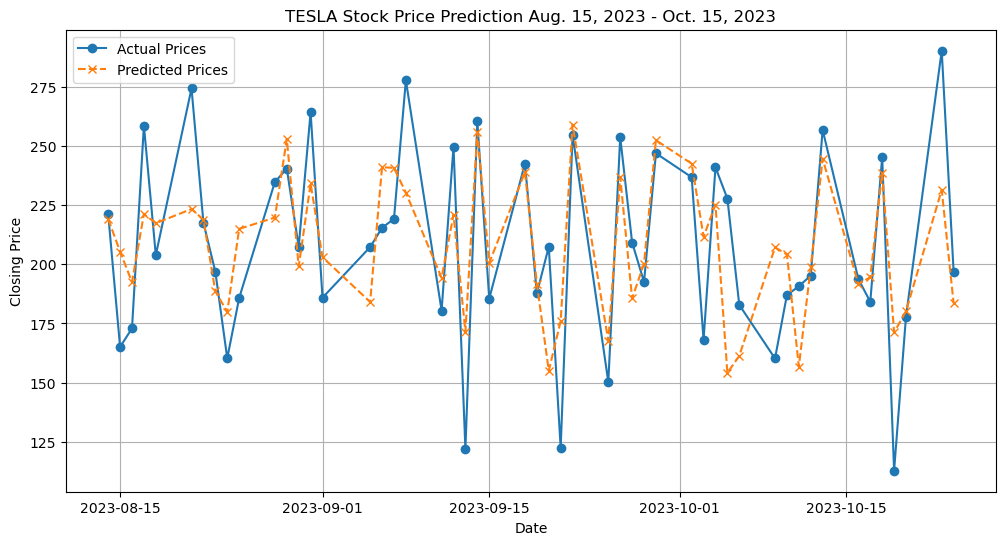

In [192]:
#Plotter den forutsiende kursen og den ekte prisen mot hverandre
plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Actual Prices', marker='o')
plt.plot(date_test, y_pred, label='Predicted Prices', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TESLA Stock Price Prediction Aug. 15, 2023 - Oct. 15, 2023')
plt.legend()
plt.grid(True)

In [193]:
plt.show()

In [194]:
#Kalkulerer hvor presis modellen er til å forutsi
mae = mean_absolute_error(y_test, y_pred)
prediction_percentage_score = 100 - (mae / y_test.mean()) * 100

print(f"Prediction Accuracy: {prediction_percentage_score:.2f}%")

Prediction Accuracy: 89.16%


In [195]:
#Brukeren spesifiserer hvilken dato de vil ha en forutsigelse for
user_target_date = '2023-10-15'   #Endre dette til din ønskede dato
user_target_date = datetime.strptime(user_target_date, '%Y-%m-%d')
target_date_ordinal = user_target_date.toordinal()

#Forutsier aksjekursen for den datoen som er valgt av brukeren
predicted_price = model.predict(X_test)

In [196]:
print(predicted_price)

219.21333855084958
